## Data Visualization
Visualizing the data to observe the distribution and effect of outlier removal.

In [81]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset
Read the dataset into a Pandas DataFrame.

In [83]:
# Load data from a CSV file
df=pd.read_csv("placement1.csv")

In [85]:
df.head()


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [13]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


## Data Visualization
Visualizing the data to observe the distribution and effect of outlier removal.

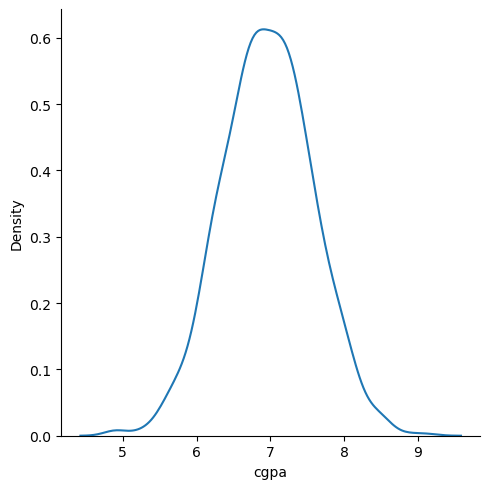

In [29]:
# Visualize the data
sns.displot(data=df,x="cgpa", kind="kde")

## Data Visualization
Visualizing the data to observe the distribution and effect of outlier removal.

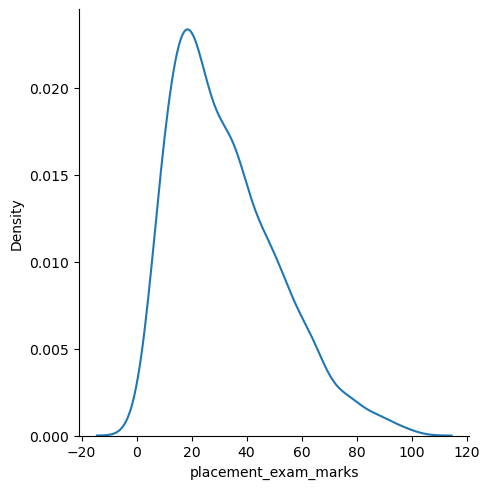

In [31]:
# Visualize the data
sns.displot(df["placement_exam_marks"],kind="kde")

In [37]:
df["cgpa"].skew()
df["placement_exam_marks"].skew()

0.8356419499466834

In [39]:
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [55]:
df[(df["cgpa"] >  8.80) | (df["cgpa"] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [57]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()


In [59]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [61]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [63]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [87]:
upper_limit=df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit=df['cgpa'].mean() - 3*df['cgpa'].std()

In [89]:
df["cgpa"]=np.where(df["cgpa"]>upper_limit,
                   upper_limit,
                   np.where(df["cgpa"]<lower_limit,
                           lower_limit,
                           df["cgpa"]
                           )
                   )

In [91]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.225000,0.489000
std,0.612688,19.130822,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,100.000000,1.000000
